 **PIMA Indians**
 
 The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets

In [2]:
df = pd.read_csv('diabetes.csv')

df['triceps'].replace(to_replace=0, value = np.nan, inplace=True)
df['insulin'].replace(to_replace=0, value = np.nan, inplace=True)
df['bmi'].replace(to_replace=0, value = np.nan, inplace=True)

df['triceps'].replace(to_replace=np.nan, value = df['triceps'].mean(), inplace=True)
df['insulin'].replace(to_replace=np.nan, value = df['insulin'].mean(), inplace=True)
df['bmi'].replace(to_replace=np.nan, value = df['bmi'].mean(), inplace=True)

In [3]:
y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values

**Matriz de confusão**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 52  50]]
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       206
          1       0.62      0.49      0.55       102

avg / total       0.72      0.73      0.72       308



## LogisticRegression

Regularization parameter: $C$
 
$C$ controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large $C$ can lead to an overfit model, while a small $C$ can lead to an underfit model.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 35  67]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.69      0.66      0.67       102

avg / total       0.79      0.79      0.79       308



**ROC curves** provide a way to visually evaluate models

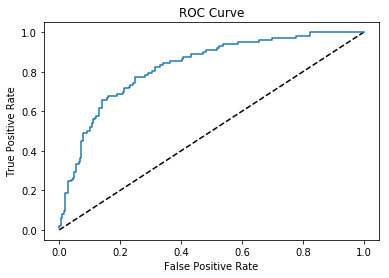

In [6]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test , y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr , tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**AUC** - Area under ROC curve

In [7]:
# Compute and print AUC score
AUC = roc_auc_score(y_test, y_pred_prob)

print("AUC: {}".format(AUC))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8255758614125261
AUC scores computed using 5-fold cross-validation: [ 0.80185185  0.80666667  0.81481481  0.86245283  0.8554717 ]


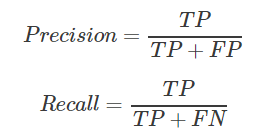

## Hyperparameter tuning with GridSearchCV

In [8]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Best score is 0.7708333333333334


**RandomizedSearchCV** & **Método da árvore de decisões**

O RandomizedSearchCV nunca irá superar a performce do GridSearchCV. Ao invês disso, ele é valioso por poupar tempo computacional.

In [9]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV (tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 6}
Best score is 0.73828125


**Tuned Logistic Regression**

In [10]:
# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_ ))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_ ))

Tuned Logistic Regression Parameter: {'C': 0.43939705607607948, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7652173913043478


In [12]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Users\dmacedo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dmacedo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dmacedo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dmacedo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_m

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.034482758620689655}
Tuned ElasticNet R squared: 0.25110015989224843
Tuned ElasticNet MSE: 0.16587834626775252
